In [24]:
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import numpy as np
import random 
import os 
import shutil


In [25]:
path = Path().absolute() # gemini helped since i have never really used pathlib before, self explanatory tho
original_data_path = path/"original_data"
train_data_path = original_data_path/"train"/"train"
test_data_path = original_data_path/"test"/"test"
train_data_path

WindowsPath('c:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/lab2/original_data/train/train')

In [26]:
train_image_list = list(train_data_path.iterdir())
images = random.sample(train_image_list, 10)  # i have create a list of all the paths and this now randomly samples 10 paths from that list and stores it in images


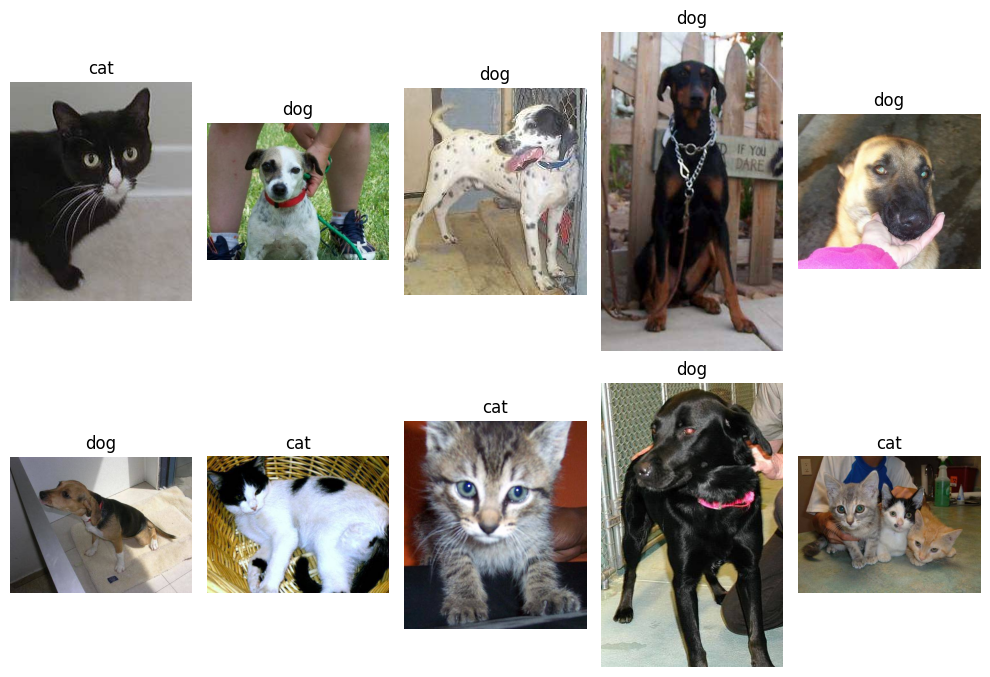

In [27]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_data_path, images[i])
    image = plt.imread(image_path)       
    ax.imshow(image)                    
    filename = os.path.basename(image_path)  # Get filename from path
    ax.set_title(filename[:3])
    ax.axis("off")

fig.tight_layout()  

In [28]:
import os
import random
import shutil

def move_files(source_data_path, dest_data_path, no_of_files ):
    source = source_data_path 
    dest = dest_data_path 

    files = os.listdir(source)
    num_files = no_of_files  

    for file_name in random.sample(files, num_files): # using random.sample ensures that we get entries from files, wihtout replacment
        shutil.move(os.path.join(source, file_name), dest)

In [29]:
ex_small_data = path/"experiment_small_data"
ex_small_test = ex_small_data/"test"
ex_small_train = ex_small_data/"train"
ex_small_val = ex_small_data/"val"

ex_tiny_data = path/"experiment_tiny_data"
ex_tiny_test = ex_tiny_data/"test"
ex_tiny_train = ex_tiny_data/"train"
ex_tiny_val = ex_tiny_data/"val"


In [30]:
# move_files(train_data_path, ex_small_train, 1600) !!! dont run this twice since we are always moving more and more files into the directories
# move_files(test_data_path, ex_small_test, 500)
# move_files(train_data_path, ex_small_val, 400)
#
# move_files(train_data_path, ex_tiny_train, 160)
# move_files(test_data_path, ex_tiny_test, 50)
# move_files(train_data_path, ex_tiny_val, 40)


In [31]:
def count_files_test(path):

  count = 0
  for entry in os.scandir(path):
    if entry.is_file():
      count += 1
  return count

# count_files_test(ex_small_train), count_files_test(ex_small_test), count_files_test(ex_small_val)
# count_files_test(ex_tiny_train), count_files_test(ex_tiny_test), count_files_test(ex_tiny_val)
count_files_test(ex_small_train)

1600

In [32]:
import cv2


def data_image_label(data_path): 
    images = []  
    labels = []  

    for root, _, filenames in os.walk(data_path):
        # Iterate over files in current directory.
        for filename in filenames:
            label = 0 if "dog" in filename.lower() else 1
            image_path = os.path.join(root, filename) # Construct full path to image.
            
            image = cv2.imread(image_path) # Read image from file.
            if image is not None: # If image is successfully loaded.
                images.append(image) # Append image to list.
                labels.append(label) # Append corresponding label to list.
            else:
                print(f"Error loading image: {image_path}") 

    # Return list of images and corresponding labels.
    return images, np.array(labels)

images, labels = data_image_label(ex_small_train)

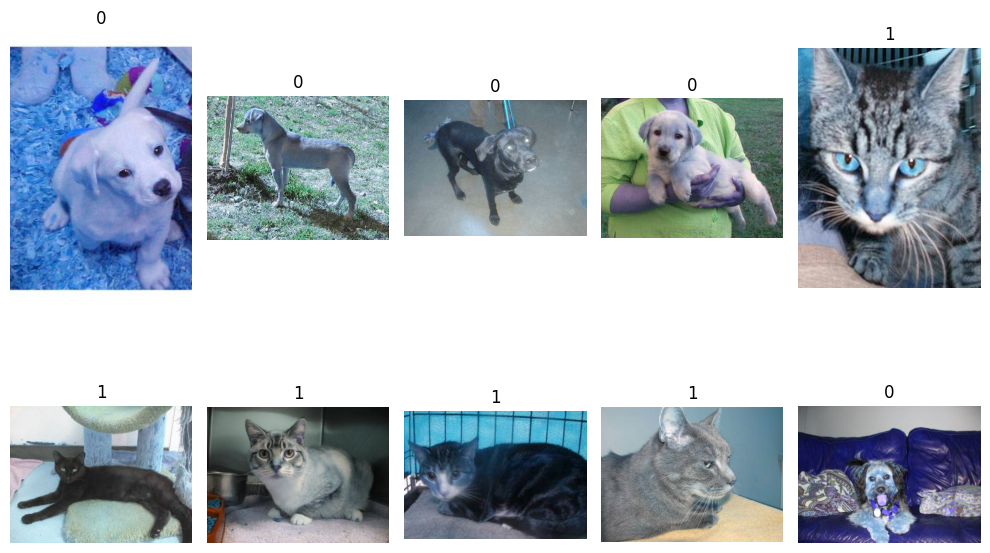

In [33]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
random_indices = random.sample(range(len(images)), 10)
for i, ax in enumerate(axes.flatten()):
    index = random_indices[i]
    ax.imshow(images[index])     # since imread expects a path file..               
    ax.set_title(labels[index])
    ax.axis("off")

fig.tight_layout()  

<BarContainer object of 3 artists>

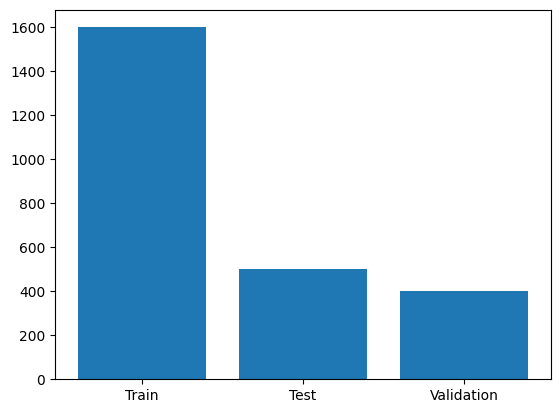

In [34]:
exp_train, exp_test, exp_val = count_files_test(ex_small_train), count_files_test(ex_small_test), count_files_test(ex_small_val)

categories = ["Train", "Test", "Validation"]
counts = [exp_train, exp_test, exp_val]

plt.bar(categories, counts)

splitting

In [35]:
X_train, y_train = data_image_label(ex_small_train)
X_test, y_test = data_image_label(ex_small_test)
X_val, y_val = data_image_label(ex_small_val)


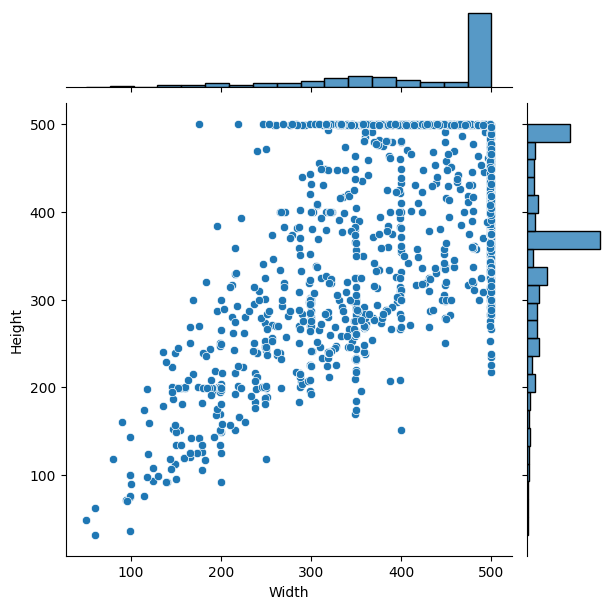

In [36]:
import seaborn as sns
 
def get_image_sizes(data_path): # basically the same function from above where we create list for images_sizes instead and then take the shape ignore the rgb channel and append width and height to ime_sizes 
    image_sizes = []
    for filename in os.listdir(data_path): # loop thorugh data_path which is a list of strings 
        image_path = os.path.join(data_path, filename) # this os function joins the data_path and filename strings ttoghether to create the full path to the specific file
        if os.path.isfile(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                height, width, _ = image.shape
                image_sizes.append((width, height))
    return image_sizes


train_image_sizes = get_image_sizes(ex_small_train)

# Convert list of tuples to separate lists for width and height had help since i could not figure this part out. it would not plot
widths, heights = zip(*train_image_sizes)

# Create a jointplot
sns.jointplot(x=widths, y=heights, kind="scatter")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [37]:
# Ensure that the labels are random and shuffled we went thorugh all labels stored in y
np.random.shuffle(y_train)
y_train[:300]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [140]:
np.random.shuffle(y_val)
# shuffle y_val also since this if for tune hyperparameters, y_test on the otherhand dont need to be shuffledsince its strictly used for evaluating the final results not training
y_val[:400]


208


1b

- im choosing to go with a smaller size so its not that heavy on the computation

In [39]:
def change_sizes(data_path, size=(180, 200)): 
    images = []
    for filename in os.listdir(data_path): # loop thorugh data_path which is a list of strings 
        image_path = os.path.join(data_path, filename) # this os function joins the data_path and filename strings ttoghether to create the full path to the specific file
        image = cv2.imread(image_path) # read the image from the file since cv2
        smaller_image = cv2.resize(image, size)
        images.append(smaller_image)

    return np.array(images) # since these are not np.array yet !!!!!! look at the theory behind this 



In [40]:
X_train = change_sizes(ex_small_train)
X_test = change_sizes(ex_small_test)
X_val = change_sizes(ex_small_val)

In [41]:
X_val.shape, X_test.shape, X_train.shape # correct

((400, 200, 180, 3), (500, 200, 180, 3), (1600, 200, 180, 3))

In [42]:
X_train, y_train


(array([[[[ 40,  44,  39],
          [ 43,  44,  40],
          [ 47,  45,  41],
          ...,
          [169, 192, 194],
          [172, 203, 206],
          [163, 197, 201]],
 
         [[ 41,  45,  40],
          [ 43,  44,  40],
          [ 46,  44,  40],
          ...,
          [168, 189, 191],
          [167, 197, 200],
          [162, 194, 198]],
 
         [[ 40,  44,  39],
          [ 41,  42,  38],
          [ 43,  41,  37],
          ...,
          [165, 184, 188],
          [164, 193, 197],
          [167, 199, 204]],
 
         ...,
 
         [[ 27,  26,  28],
          [ 24,  23,  25],
          [ 20,  19,  21],
          ...,
          [ 30,  35,  49],
          [ 22,  28,  41],
          [ 28,  34,  45]],
 
         [[ 30,  29,  31],
          [ 25,  24,  26],
          [ 21,  20,  22],
          ...,
          [ 12,  19,  33],
          [ 18,  25,  38],
          [ 34,  41,  52]],
 
         [[ 30,  29,  31],
          [ 24,  23,  25],
          [ 19,  18,  20],
   

In [111]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255
scaled_X_val = X_val.astype("float32") / 255
scaled_X_train.flatten().min(), scaled_X_test.flatten().max()    


(0.0, 1.0)

In [80]:
import tensorflow as tf
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    height_shift_range=0.1,
    width_shift_range=0.2,
    
)


train_generator = train_image_generator.flow(scaled_X_train, y_train, batch_size=32) # use batch_size 32 to create batches of images, memory effecient
val_generator = train_image_generator.flow(scaled_X_val, y_val, batch_size=32)

In [81]:
X_train.flatten().max(), X_train.flatten().min(),  # between 0, 255 scale them 

(255, 0)

In [82]:
X_train.shape[1:]

(200, 180, 3)

model 


have swaped the dense layers neruons from 256 - 350 -  512 
swap kernels=[32,64,32] - kernels=[32, 32]  - kernels=[32,64, 128] - kernels=[32,64,128,256] 

add l2 regularizer since i had a major overfitting problem. 

another approach could be to swap images in my training data, i have a even distrubition between cats and dogs but it could be a problem with the existing samples. 

changed neruons in the dense layers everal times again, 

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def cnn_model(learning_rate=0.001, drop_rate=0.3, kernels=[32, 64, 128, 256]):
    adam = Adam(learning_rate=learning_rate)
    l2_reg = 0.001  # L2 regularization parameter

    model = Sequential(name="CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel,
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            kernel_regularizer=l2(l2_reg),  # Apply L2 regularization to convolutional layers
            input_shape=X_train.shape[1:],
        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())
    model.add(Dropout(drop_rate))  # Apply dropout regularization to the fully connected layers
    model.add(Dense(512, activation="relu", kernel_regularizer=l2(l2_reg))) # add l2 regularization since my model is overfitting a lot 
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = cnn_model()
model.summary()

c:\Users\Noah7\code\Github\AI-Noah-Eliasson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 198, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 99, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 97, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 48, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 46, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 23, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 21, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 10, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    11,796,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,185,921 (46.49 MB)

 Trainable params: 12,185,921 (46.49 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
from tensorflow.keras.callbacks import EarlyStopping # without agumentation !!

early_stopper = EarlyStopping(
    monitor="val_acc", mode="max", patience=3, restore_best_weights=True # swap patience to even lower since the overfitting problem is adhearent after 7 epochs 
)

model.fit(
    scaled_X_train, 
    y_train, # 
    epochs=15, # 7 would be the best 
    callbacks=[early_stopper],
    validation_data = (scaled_X_val, y_val) 
)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 746ms/step - acc: 0.5284 - loss: 1.0608 - val_acc: 0.5125 - val_loss: 1.0386
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 728ms/step - acc: 0.5764 - loss: 1.0122 - val_acc: 0.5350 - val_loss: 1.0162
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 731ms/step - acc: 0.5665 - loss: 0.9808 - val_acc: 0.5275 - val_loss: 0.9832
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 713ms/step - acc: 0.6009 - loss: 0.9365 - val_acc: 0.4600 - val_loss: 0.9761
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 686ms/step - acc: 0.5742 - loss: 0.9255 - val_acc: 0.5075 - val_loss: 0.9615


In [154]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.534375,1.049819,0.5125,1.038598
1,0.576875,1.003067,0.5350,1.016173
2,0.566250,0.975079,0.5275,0.983208
3,0.588125,0.938735,0.4600,0.976135
4,0.591875,0.921877,0.5075,0.961484


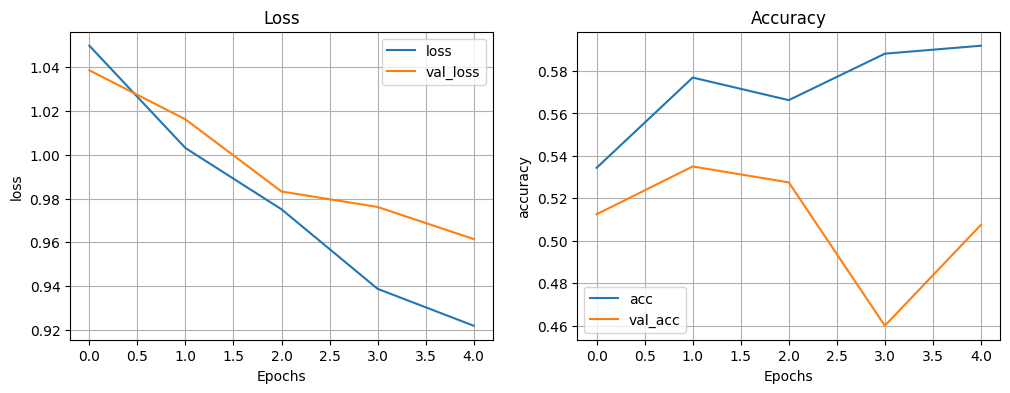

In [155]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="accuracy")

plot_metrics(metrics)

# although there are some

In [197]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


In [199]:
y_pred = (y_pred_prob > 0.5).astype(int) # 0.5 since we are using sigmoid activation and outpout, and the output , the values are between 1 and 0.
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix

array([[  9, 183],
       [  9, 199]], dtype=int64)

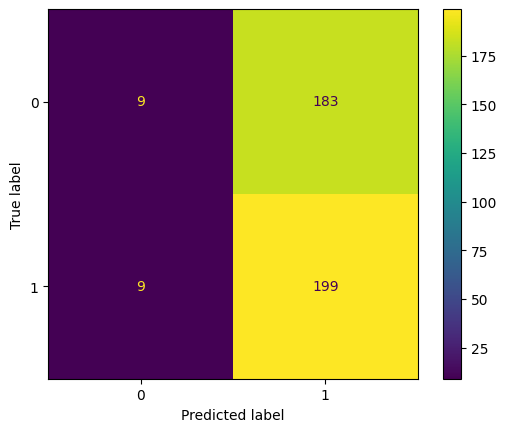

In [196]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [201]:
print(classification_report(y_val, y_pred > .5))


              precision    recall  f1-score   support

           0       0.50      0.05      0.09       192
           1       0.52      0.96      0.67       208

    accuracy                           0.52       400
   macro avg       0.51      0.50      0.38       400
weighted avg       0.51      0.52      0.39       400



seems to be a big problem either with class imbalance or regularization or something else. i feel like i have learned alot and if i could do it all over i would have done things diffrently to be specific i think the problems root in the data handling. I have no time to get this done today unfortunetly since the deadline is in 2 hours

- could also be me misunderstanding the plotting?

with augmentation


In [ ]:
training_steps_per_epoch = len(X_train)//32
validation_steps_per_epoch = len(X_val)//32
# we create batches of len x_train in this case // 32 which creates x batches of 32 samples each will be prosseed per epoch 

training_steps_per_epoch, validation_steps_per_epoch

In [188]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor="val_loss", mode="min", patience=10, restore_best_weights=True
)

augmentation_model = model.fit(
    train_generator, # 
    steps_per_epoch=training_steps_per_epoch,
    epochs=50,
    callbacks=[early_stopper],
    validation_data = val_generator, # this will give us batches for validation
    validation_steps = validation_steps_per_epoch
)

Epoch 1/50


50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 747ms/step - acc: 0.5297 - loss: 0.7608 - val_acc: 0.5260 - val_loss: 0.7580
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3125 - val_loss: 0.3868
Epoch 3/50


C:\Users\Noah7\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 717ms/step - acc: 0.5219 - loss: 0.7574 - val_acc: 0.5026 - val_loss: 0.7596
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5000 - val_loss: 0.3848
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 723ms/step - acc: 0.5254 - loss: 0.7555 - val_acc: 0.5104 - val_loss: 0.7601
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5625 - val_loss: 0.3651
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 714ms/step - acc: 0.5380 - loss: 0.7519 - val_acc: 0.5078 - val_loss: 0.7557
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5625 - val_loss: 0.3762
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 717ms/step - acc: 0.5332 - loss: 0.7517 - val_acc: 0.4740 - val_loss: 0.7526
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3750 - val_loss: 0.3788
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━

In [204]:
metrics = pd.DataFrame(augmentation_model.history.history)
metrics.head()

AttributeError: 'dict' object has no attribute 'history'

after rundown of tuning as the last model i cant seem to get the augmentation to work, after some research has noise sensitive models when working with augmentation and small sample range, which 1600 images is in this case. although might this is only 1 of many possible reasons 

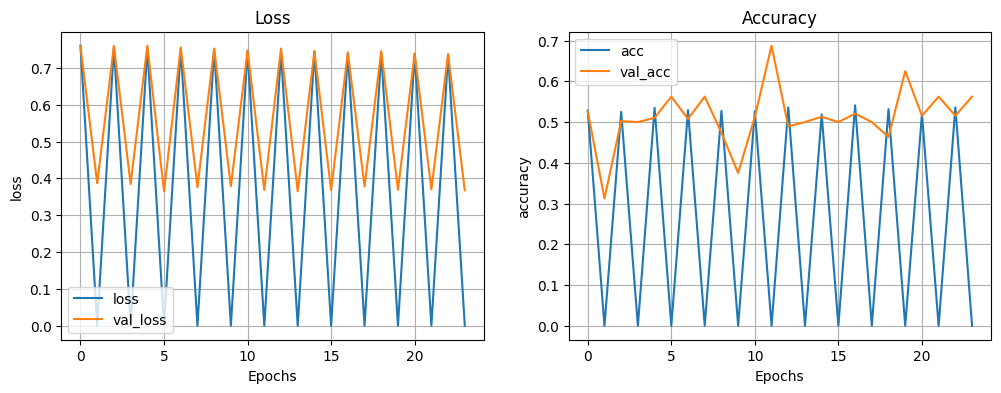

In [191]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="accuracy")

plot_metrics(metrics)

transfer learning

In [210]:
scaled_X_train.shape[1:]

(200, 180, 3)

In [224]:
from tensorflow.keras.applications import Xception

feature_extractor = Xception(
    weights="imagenet", include_top=False, input_shape=(scaled_X_train.shape[1:])
)


In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

feature_extractor = Xception(
    weights="imagenet", include_top=False, input_shape=(scaled_X_train.shape[1:])
)
"""" set the model with the same params as above """
model_xception = Sequential(
    [
        feature_extractor, # Xception
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(512, activation="relu", kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

# freeze Xception
for layer in feature_extractor.layers:
    layer.trainable = False

model_xception.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

model_xception.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [216]:
xception_model_fitted = model_xception.fit(
    scaled_X_train,
    y_train,
    epochs= 50,
    callbacks= [early_stopper], # is at 3
    validation_data= (scaled_X_val, y_val),
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - acc: 0.5162 - loss: 0.8668 - val_acc: 0.4925 - val_loss: 0.7210
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.5681 - loss: 0.6977 - val_acc: 0.5325 - val_loss: 0.7188
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.6032 - loss: 0.6375 - val_acc: 0.5000 - val_loss: 0.7244
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.6334 - loss: 0.6231 - val_acc: 0.4625 - val_loss: 0.7395
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.6206 - loss: 0.6419 - val_acc: 0.5200 - val_loss: 0.7551
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - acc: 0.6744 - loss: 0.5999 - val_acc: 0.4825 - val_loss: 0.7566
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.7082 - loss: 0.5740 - val_acc: 0.5125 - val_loss: 0.7491
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.7180 - loss: 0.5525 - val_acc: 0.4900 - val_loss: 0.7869
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.7409 - loss: 

In [222]:
metrics_xception = pd.DataFrame(model_xception.history.history)
metrics_xception.head()

,acc,loss,val_acc,val_loss
0,0.516250,0.839430,0.4925,0.720972
1,0.570625,0.699628,0.5325,0.718764
2,0.601875,0.655617,0.5000,0.724413
3,0.626875,0.635900,0.4625,0.739464
4,0.627500,0.636764,0.5200,0.755147


In [228]:
count = 0
for label in y_val:
    if label == 1:
        count += 1

print(count)

208


honestly after many thoughts and running back and fourth several times i think something has to do with the data, 

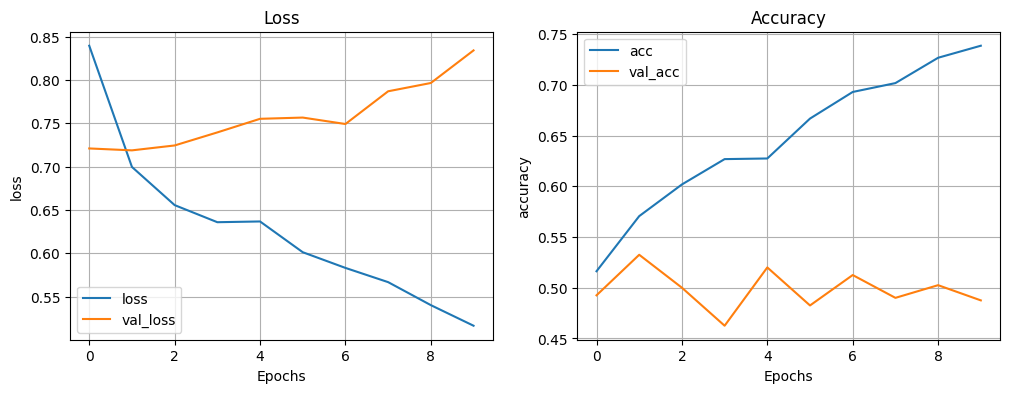

In [223]:

plot_metrics(metrics_xception)

 3/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


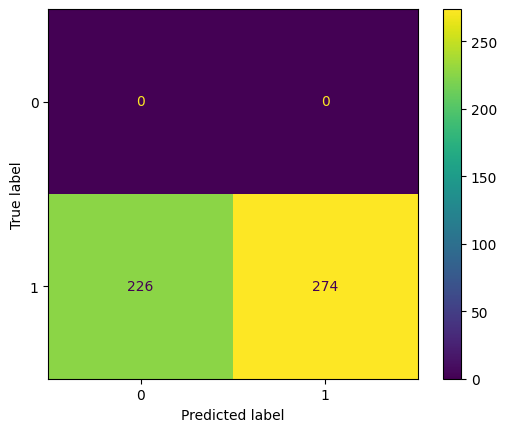

array([[  0,   0],
       [226, 274]], dtype=int64)

In [233]:
y_test_pred_prob = model_xception.predict(scaled_X_test)

y_test_pred = (y_test_pred_prob > 0.5).astype(int)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the test set
ConfusionMatrixDisplay(conf_matrix_test).plot()
plt.show()
conf_matrix_test

sammanfattning: Något har gått fel tidigt inpå gissar jag på skulle behövt vägledning egentligen men har tyvärr varit sjuk i början av veckan igen. jag har tyvärr inte tiden nu att debugga eftersom det tar mig 15 min bara för att testa en ändring vilket är lite frustrerande. allt i allo har jag lärt mig mycket eftersom en stor del av allt har gått fel så det är ju postivt.

In [235]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"Training set class distribution: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_val, return_counts=True)
print(f"Validation set class distribution: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test set class distribution: {dict(zip(unique, counts))}")

Training set class distribution: {0: 787, 1: 813}
Validation set class distribution: {0: 192, 1: 208}
Test set class distribution: {1: 500}


In [236]:
y_pred_prob = model_xception.predict(scaled_X_val)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Print a few predictions
print(f"Predictions (first 10): {y_pred[:10].flatten()}") # here we have atleast 1 predicit 0 i might misunderstood, need futher help from teacher 
print(f"True labels (first 10): {y_val[:10]}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Predictions (first 10): [1 1 1 1 1 0 1 1 1 1]
True labels (first 10): [0 0 0 0 1 0 1 1 1 1]
